# 1. Google Play Store apps and reviews

In [26]:
#importar pandas
import pandas as pd

#ler em dataframe
apps_with_duplicates = pd.read_csv("C:/Users/Frederico/Desktop/projetos/apps.csv")

#eliminar informações duplicadas
apps = apps_with_duplicates.drop_duplicates()

#número total de apps
print("O número total de apps é:", len(apps))

#informações do dataset
apps.info()

#analisar 5 linhas aleatórias
n = 5
apps.sample(n)

O número total de apps é: 9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2455,3157,Free Radar Detector,TRAVEL_AND_LOCAL,4.3,15680,11.0,"1,000,000+",Free,0,Everyone,Travel & Local,"July 6, 2018",6.2.3,4.1 and up
4189,5140,Sayers AH,MEDICAL,NaN,0,29.0,50+,Free,0,Everyone,Medical,"January 17, 2018",300000.0.97,4.0.3 and up
8427,9554,TV Local El Salvador,FAMILY,4.3,323,3.6,"10,000+",Free,0,Everyone,Entertainment,"May 8, 2018",1,4.0.3 and up
508,609,Girls Live Chat - Free Text & Video Chat,DATING,4.8,110,4.9,"10,000+",Free,0,Mature 17+,Dating,"July 9, 2018",8.2,4.0.3 and up
9183,10355,Santa Fe App,SPORTS,NaN,196,5.0,"5,000+",Free,0,Everyone,Sports,"August 9, 2017",2.1.0,4.0.3 and up


# 2. Limpando os Dados

In [27]:
#remover caracteres
chars_to_remove = ["+", ",", "$"]

#remover colunas
cols_to_clean = ["Installs", "Price"]

#loop
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    apps[col] = pd.to_numeric(apps[col])  

# 3.  Explorando as categorias

In [28]:
#importar plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# numero total de categorias (unicas)
num_categories = len(apps['Category'].unique())
print('Number of categories =', num_categories)

# contar o numero de apps em cada 'Category' e sortir ele em ordem descendente
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories = 33


# 4. Distribuição das avaliações

In [29]:
# média das notas dos apps
avg_app_rating = apps['Rating'].mean()
print('Avarage app rating = ', avg_app_rating) 

# distribuição dos apps de acordo com nota
data = [go.Histogram(
        x = apps['Rating']
)]


layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Avarage app rating =  4.173243045387998


# 5. Tamanho e preço de um app

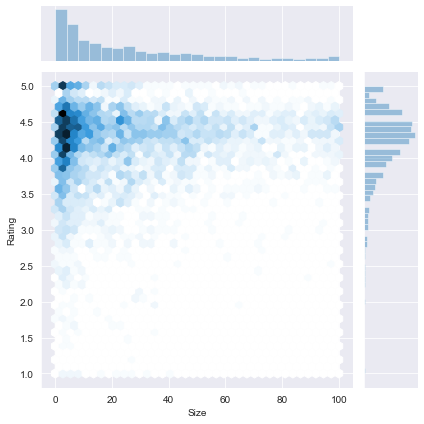

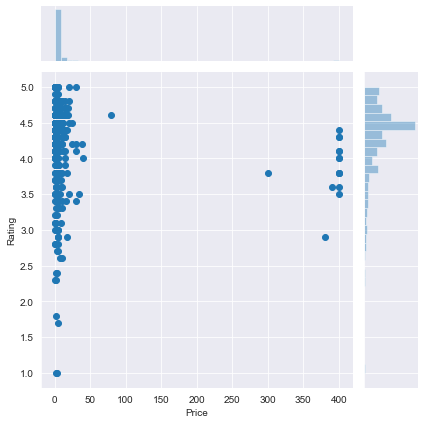

In [30]:
# tamanho e preço do app
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# filtrar linhas onde o valor das colunas 'Rating' e 'Size' estão presentes
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# filtrar categorias com pelo menos 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250).reset_index()

# plotar size vs rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

#dataframe com apps pagos
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# plotar price vs rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

# 6. Relação entre categoria e preço

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


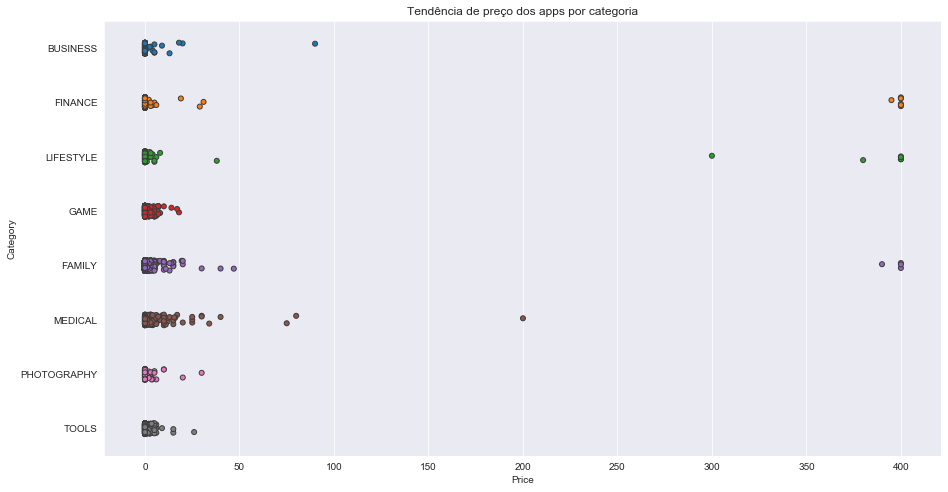

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# selecionar algumas categorias de app
popular_apps_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# tendência de preço (price vs category)
ax = sns.stripplot(x = popular_apps_cats['Price'], y = popular_apps_cats['Category'], jitter=True, linewidth=1)
ax.set_title('Tendência de preço dos apps por categoria')

# apps em que o preço é superior a $200
apps_above_200 = popular_apps_cats[['Category', 'App', 'Price']][popular_apps_cats['Price'] > 200]
apps_above_200

# 7. Eliminando apps inúteis

Text(0.5, 1.0, 'Tendência de preço do aplicativo por categoria')

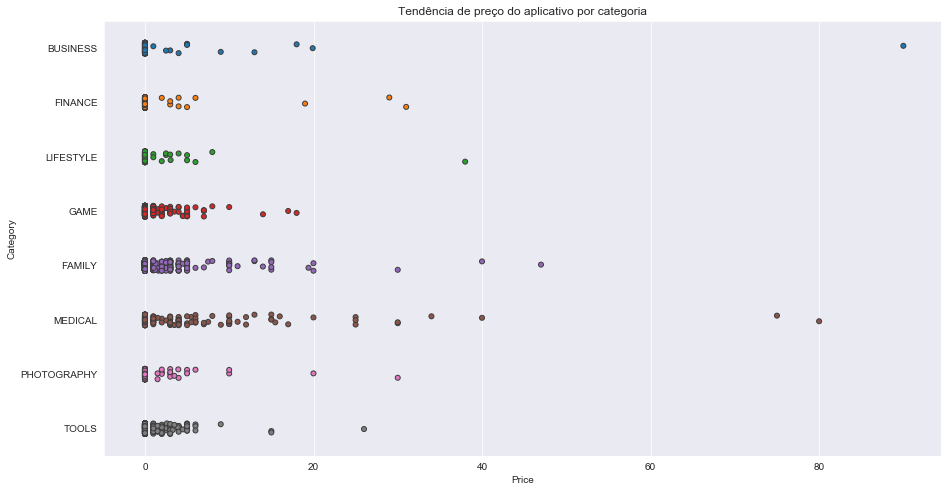

In [32]:
# selecionar apps abaixo de $100
apps_under_100 = popular_apps_cats[popular_apps_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# preço vs categoria
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, 
                  jitter=True, linewidth=1)
ax.set_title('Tendência de preço do aplicativo por categoria')

# 8. Popularidade: apps pagos vs apps gratuitos

In [33]:
trace0 = go.Box(
    # Dados dos apps pagos
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Dados dos apps gratuitos
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Download de apps pagos vs apps gratuitos",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# plotar gráfico
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# 9. Análise de sentimento dos usuários

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

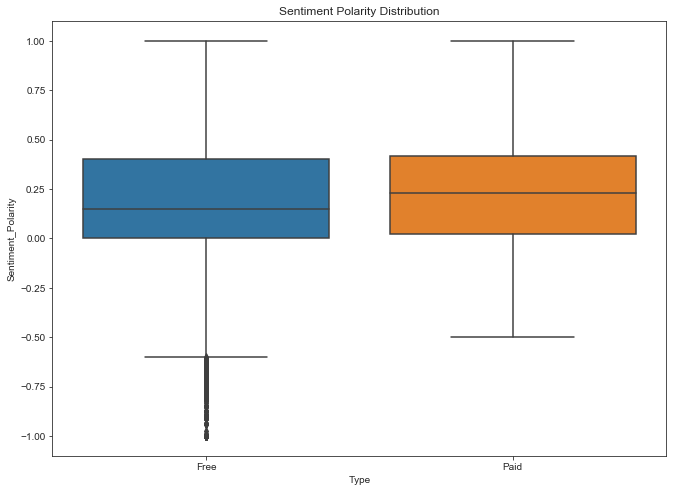

In [34]:
# Carregar review dos usuários
reviews_df = pd.read_csv("C:/Users/Frederico/Desktop/projetos/user_reviews.csv")

# Agregar os dois dataframes
merged_df = pd.merge(apps, reviews_df, on = 'App', how = 'inner')

# Eliminar valores NA das colunas Sentiment e Translated_Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Sentimento do usuário em face à apps pagos vs apps gratuitos
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')